## Getaran Pegas
![picture](https://drive.google.com/uc?export=view&id=13aukwT_frorrujWJxt1NA4Nxu0x4P67P)

Percepatan benda tanpa hambatan:

$$ a = - \frac{k}{m} x $$

Bila ada hambatan:

$$ a = - \frac{k}{m} x - \frac{c}{m} v $$

Dalam bentuk PD:

$$ \frac{d^2x}{dt^2} + \frac{c}{m} \frac{dx}{dt} + \frac{k}{m} x = 0 $$


### Algoritma solusi numerik (Feynman-Newton)

![picture](https://drive.google.com/uc?export=view&id=1isPmLKctD126PFaY27kx1scfntZCpCQC)

### Solusi analitik

$$ x(t) = e^{-\gamma t} \; x_0 \; \cos{(\omega t)} $$

Dengan

$$ \gamma = \frac{c}{2m} \;\; \text{dan} \;\; \omega = \sqrt{\tfrac{k}{m} + \gamma^2} $$

dan

$$ v(t) = x_0 \; e^{-\gamma t}(-\gamma\cos(\omega t ) - \omega \sin(\omega t)) $$



* Buktikan !

In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def fp(t, x, v, k, c):
    return -k*x-c*v

In [3]:
def euler(t, x, v, k, c, m):
    n = len(t)
    dt = t[1]-t[0]
    for i in range(n-1):
        v[i+1] = v[i] + dt * fp(t[i], x[i], v[i], k, c)/m # a = F/m
        x[i+1] = x[i] + dt * v[i+1]
    return x, v

In [4]:
def fn_1D(t, x, v, k, c, m):
    n = len(t)
    dt = t[1]-t[0]
    
    v[1] = v[0] + (dt/2) * fp(t[0], x[0], v[0], k, c)/m
    x[1] = x[0] + dt*v[1]
    
    for i in range(1, n-1):
        v[i+1] = v[i] + dt*fp(t[i], x[i], v[i], k, c)/m
        x[i+1] = x[i] + dt*v[i+1]
    return x, v

In [11]:
def fn_1D_dua(t, x, v, k, c, m):
    n = len(t)
    dt = t[1]-t[0]
    
    for i in range(0, n-1):
        x[i+1] = x[i] + dt/2*v[i+1]        
        v[i+1] = v[i] + dt/2*fp(t[i], x[i], v[i], k, c)/m        
        x[i+1] = x[i] + dt*v[i+1]
        v[i+1] = v[i] + dt*fp(t[i+1], x[i+1], v[i+1], k, c)/m        
    return x, v

In [6]:
def rk_solver1D(t, x, v, k, c, m):
    n = len(t)
    dt = t[1]-t[0]

    for i in range(n-1):
        k1 = dt * fp(t[i], x[i], v[i], k, c)/m
        k2 = dt * fp(t[i]+dt/2, x[i]+dt/2*v[i], v[i]+k1/2, k, c)/m
        k3 = dt * fp(t[i]+dt/2, x[i]+dt/2*v[i]+dt/4*k1, v[i]+k2/2, k, c)/m
        k4 = dt * fp(t[i]+dt, x[i]+dt*v[i]+dt/2*k2, v[i]+k3,k, c)/m
        
        x[i+1] = x[i] + dt*(v[i] + (k1 + k2 + k3)/6)
        v[i+1] = v[i] + (k1 + 2*k2 + 2*k3 + k4)/6
 
        # k1 = dt * fxy(t[i], x[i], vx[i], y[i], vy[i], d, ke, me)[1]/me
        # k2 = dt * fxy(t[i]+dt/2, x[i]+dt/2*vx[i], vx[i]+k1/2, y[i]+dt/2*vy[i], vy[i]+k1/2, d, ke, me)[1]/me
        # k3 = dt * fxy(t[i]+dt/2, x[i]+dt/2*vx[i]+dt/4*k1, vx[i]+k2/2, y[i]+dt/2*vy[i], vy[i]+k2/2, d, ke, me)[1]/me
        # k4 = dt * fxy(t[i]+dt, x[i]+dt*vx[i]+dt/2*k2, vx[i]+k3, y[i]+dt*vy[i]+dt/2*k2, vy[i]+k3, d, ke, me)[1]/me
        
        # y[i+1] = y[i] + dt*(vy[i] + (k1 + k2 + k3)/6)
        # vy[i+1] = vy[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return x, v

In [7]:
def rk_1D(t, x, v, k, c, m):
    n = len(t)
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = dt * fp(t[i], x[i], v[i], k, c)/m
        k2 = dt * fp(t[i]+dt/2, x[i]+dt/2*v[i], v[i]+0.5*k1, k, c)/m
        k3 = dt * fp(t[i]+dt/2, x[i]+dt/2*v[i]+dt/4*k1, v[i]+0.5*k2, k, c)/m
        k4 = dt * fp(t[i]+dt, x[i]+dt*v[i]+dt/2*k2, v[i]+k3, k, c)/m
        
        x[i+1] = x[i] + dt * (v[i] + (k1 + k2 + k3)/6)
        v[i+1] = v[i] + (k1 + 2 * k2 + 2 * k3 + k4)/6
    return x, v

In [8]:
def v_exact(t, m, k, c, A):
  gamma= c/(2*m)
  w = np.sqrt((k/m) - gamma**2)
  return A*np.exp((-gamma)*t)*((-(gamma)*np.cos(w*t))-(np.sin(w*t)*(w)))

In [9]:
def x_exact(t, m, k, c, A):
  gamma= c/(2*m)
  w = np.sqrt((k/m) - gamma**2)
  return (np.exp(-gamma*t))*(A*np.cos(w*t))

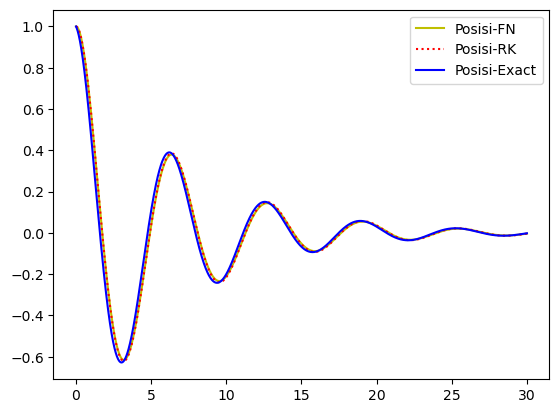

In [12]:
m = 1
k = 1
c = 0.3

t = np.linspace(0, 30, 3001)

v = np.zeros(len(t))
x = np.zeros(len(t))
v[0] = 0
x[0] = 1
xe, ve = euler(t, x, v, k, c, m)

v = np.zeros(len(t))
x = np.zeros(len(t))
v[0] = 0
x[0] = 1
xfn, vfn = fn_1D_dua(t, x, v, k, c, m)

v = np.zeros(len(t))
x = np.zeros(len(t))
v[0] = 0
x[0] = 1
xrk, vrk = rk_solver1D(t, x, v, k, c, m)

A = 1
xex = x_exact(t, m, k, c, A)

# plt.plot(t, xe, 'g-.', label="Posisi-Euler")
plt.plot(t, xfn, 'y-', label="Posisi-FN")
plt.plot(t, xrk, 'r:', label="Posisi-RK")
plt.plot(t, xex, 'b-', label="Posisi-Exact")

# plt.plot(t, ve, label="Kecepatan-Euler")
plt.legend()
plt.show()

In [36]:
xex.shape

(3001,)

In [37]:
xe.shape

(3001,)

In [56]:
error_xe = np.abs(xex - xe)

In [57]:
error_xe.mean()

0.02137121612837064

In [58]:
error_xfn = np.abs(xex - xfn)

In [59]:
error_xfn.mean()

0.022065458955437944

In [ ]:
def spring_solver_fn(I1, I2, m, k, c, h, tmax):
  h = float(h)
  m = 1
  k = 1
  c = 0.3
  v = I1
  x = I2
  A = x
  t = 0
  h = 0.01
  list_t = []
  list_v = []
  list_x = []
  list_va = []
  list_xa = []
# xana = (np.exp(-gamma*t))*(A*np.cos(w*t))
# vana = A*np.exp((-gamma)*t)*((-(gamma)*np.cos(w*t))-(np.sin(w*t)*(w)))
  a = -k*x/m-c*v/m
  # v = v + a*h/2
  while t<=tmax :
    va = v_exact(t, m, k, c, A)
    xa = x_exact(t, m, k, c, A)
    list_t.append(t)
    list_v.append(v)
    list_x.append(x)
    list_va.append(va)
    list_xa.append(xa)
    # x = x + v*h
    # a = -k*x/m-c*v/m
    # v = v + a*h
    xhalf=x+v*h/2
    vhalf=v+a*h/2
    ahalf=-(k*xhalf+c*vhalf)/m
    x+=vhalf*h
    v+=ahalf*h
    t = t + h
  return list_xa, list_va, list_x, list_v, list_t

Max error(x):  0.1185353141451218
Mean error(x):  0.020337762403878176


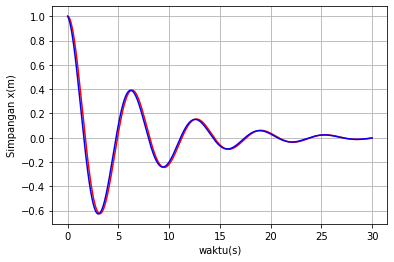

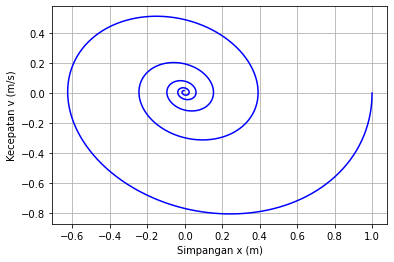

In [ ]:
# Benda Pegas dengan Metoda Feynman-Newton
import matplotlib.pyplot as plt
import numpy as np
m = 1
k = 1
c = 0.3
# v = 0
I1 = 0
# x = 1
I2 = 1
A = I2
t = 0
h = 0.01
tmax = 30
list_t = []
list_v = []
list_x = []
list_va = []
list_xa = []
list_xa, list_va, list_x, list_v, list_t = spring_solver_fn(I1, I2, m, k, c, h, tmax)

vl_error = []
for i in range(len(list_t)):
  item = np.abs(list_va[i] - list_v[i])
  vl_error.append(item)

xl_error = []
for i in range(len(list_t)):
  item = np.abs(list_xa[i] - list_x[i])
  xl_error.append(item)

print('Max error(x): ', np.max(xl_error))
print('Mean error(x): ', np.mean(xl_error))
plt.figure(1)
plt.xlabel('waktu(s)')
plt.ylabel('Simpangan x(m)')
plt.plot(list_t,list_x,'r') # x numerik
plt.plot(list_t,list_xa,'b') # x analitik
plt.grid(True)
# plt.show()
plt.figure(2)
plt.xlabel('Simpangan x (m)')
plt.ylabel('Kecepatan v (m/s)')
plt.plot(list_x, list_v, 'b') # x numerik
# plt.plot(lt,lxana,'b') # x analitik
plt.grid(True)
plt.show()

Max error(x):  0.12012463966885031

Mean error(x):  0.03747498678027167

Max error(x):  0.11449026649734889

Mean error(x):  0.0357551272787789

Max error(x):  0.1185353141451218

Mean error(x):  0.03704473137919107

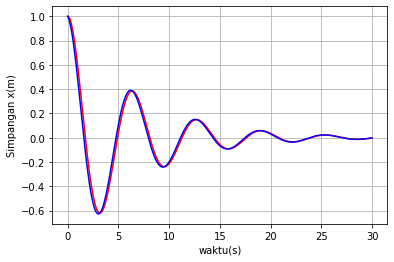

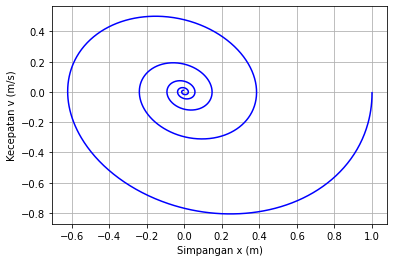

Max error:  0.12012463966885031
Mean error:  0.02047185906553222


In [ ]:
# Benda Pegas dengan Metoda Feynman-Newton
import matplotlib.pyplot as plt
import numpy as np
m = 1
k = 1
c = 0.3
v = 0
x = 1
A = x
t = 0
h = 0.01
gamma= c/(2*m)
w = np.sqrt((k/m) - gamma**2)
# xana = (np.exp(-gamma*t))*(A*np.cos(w*t))
# vana = A*np.exp((-gamma)*t)*((-(gamma)*np.cos(w*t))-(np.sin(w*t)*(w)))
lt=[]
lx=[]
lv=[]
lxana=[]
lvana=[]
lerror=[]
a = -k*x/m-c*v/m
v = v + a*h/2
while t<=30:
	lt.append(t)
	lx.append(x)
	lv.append(v)
	xana = (np.exp(-gamma*t))*(A*np.cos(w*t))
	vana = A*np.exp((-gamma)*t)*((-(gamma)*np.cos(w*t))-(np.sin(w*t)*(w)))
	lvana.append(vana)
	lxana.append(xana)
	lerror.append(abs(x-xana))
		#print(t,x)
	x = x + v*h
	a = -k*x/m-c*v/m
	v = v + a*h
	t = t + h
plt.figure(1)
plt.xlabel('waktu(s)')
plt.ylabel('Simpangan x(m)')
plt.plot(lt,lx,'r') # x numerik
plt.plot(lt,lxana,'b') # x analitik
plt.grid(True)
plt.figure(2)
plt.xlabel('Simpangan x (m)')
plt.ylabel('Kecepatan v (m/s)')
plt.plot(lx, lv, 'b') # x numerik
# plt.plot(lt,lxana,'b') # x analitik
plt.grid(True)
plt.show()
print('Max error: ', np.max(lerror))
print('Mean error: ', np.mean(lerror))

Max error:  0.0017654152949236022
Mean error:  0.0002329708218126134


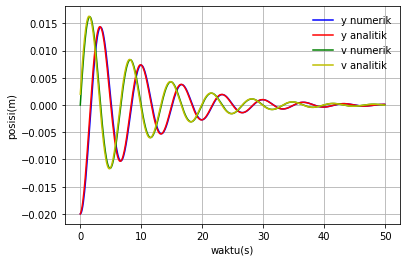

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y=-2e-2
v=0.0
t=0.0
m=1 #massa (kg)
k=0.9 #konstanta pegas (N/m)
c=0.2 #koefisien hambatan udara (kg/s)
h=0.1
tmax=50

vn=v #kecepatan numerik
yn=y #posisi numerik
A=y #Amplitudo getaran

#LIST
waktu=[]
posisiNumerik=[]
kecepatanNumerik=[]
percepatanNumerik=[]
posisiAnalitik=[]
kecepatanAnalitik=[]
s_error = []
w=np.sqrt((k/m)-(c/(2*m))**2) #frekuensi setelah teredam
l=c/(2*m) #frekuensi redaman

while t<tmax:
  a=-(k*yn+c*vn)/m
  ya=A*np.exp(-l*t)*np.cos(w*t)
  va=-A*np.exp(-l*t)*(l*np.cos(w*t)+w*np.sin(w*t))
  waktu.append(t)
  posisiNumerik.append(yn)
  kecepatanNumerik.append(vn)
  percepatanNumerik.append(a)
  posisiAnalitik.append(ya)
  kecepatanAnalitik.append(va)
  s_error.append(np.abs(ya-yn))
  yhalf=yn+vn*h/2
  vhalf=vn+a*h/2
  ahalf=-(k*yhalf+c*vhalf)/m
  yn+=vhalf*h
  vn+=ahalf*h
  t+=h

print('Max error: ', np.max(s_error))
print('Mean error: ', np.mean(s_error))

plt.plot(waktu,posisiNumerik,'b',
         label='y numerik')
plt.plot(waktu,posisiAnalitik,'r',
         label='y analitik')
plt.plot(waktu,kecepatanNumerik,'g',
         label='v numerik')
plt.plot(waktu,kecepatanAnalitik,'y',
         label='v analitik')
plt.xlabel('waktu(s)')
plt.ylabel('posisi(m)')
plt.legend(frameon=False)
plt.grid(True)
plt.show()

0.00 		 0.0200 		 0.0200 		 0.0020 		 0.0000 			 -0.0004 			 -0.0180
1.00 		 0.0105 		 0.0110 		 -0.0129 		 -0.0162 			 0.0027 			 -0.0067
2.00 		 -0.0053 		 -0.0085 		 -0.0152 		 -0.0149 			 0.0030 			 0.0107
3.00 		 -0.0142 		 -0.0181 		 -0.0055 		 0.0014 			 0.0010 			 0.0160
4.00 		 -0.0106 		 -0.0087 		 0.0067 		 0.0152 			 -0.0013 			 0.0048
5.00 		 0.0004 		 0.0089 		 0.0115 		 0.0127 			 -0.0023 			 -0.0105
6.00 		 0.0091 		 0.0163 		 0.0067 		 -0.0025 			 -0.0014 			 -0.0142
7.00 		 0.0093 		 0.0067 		 -0.0024 		 -0.0141 			 0.0005 			 -0.0032
8.00 		 0.0023 		 -0.0090 		 -0.0080 		 -0.0107 			 0.0016 			 0.0102
9.00 		 -0.0051 		 -0.0145 		 -0.0065 		 0.0034 			 0.0013 			 0.0124
10.00 		 -0.0073 		 -0.0050 		 -0.0003 		 0.0130 			 0.0001 			 0.0019
11.00 		 -0.0035 		 0.0090 		 0.0050 		 0.0088 			 -0.0010 			 -0.0099
12.00 		 0.0023 		 0.0129 		 0.0055 		 -0.0040 			 -0.0011 			 -0.0108
13.00 		 0.0053 		 0.0035 		 0.0017 		 -0.0119 			 -0.0004 			 -0.0008
14.00 		 0.0037 	

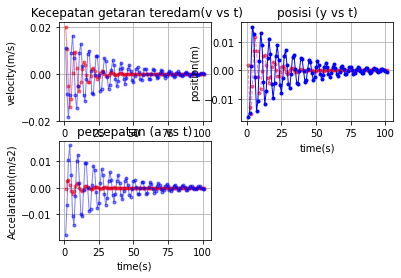

In [ ]:
#diketahui
m = 1 #dalam satuan kilogram
y = 0.02 #dalam satuan N/m
k = 0.9 #dalam satuan N/math
c = 0.2 #dalam satuan kg/m
t = 0
v = 0
h = 1 #dalam satuan s
tmax = 100 #dalam satuan sekon

#omega
w = np.sqrt(k/m)

 #list
tt = []
yy = []
vv = []
aa = []

yyFNewton = []
vvFNewton = []
aaFNewton = []

yFNewton = y
vFNewton = v

#print("t (s)", '\t', "x analitik (m)", '\t', "x FN (m)", '\t', "v analitik (m/s)", '\t', "v FN (m/s)",
 #     '\t', "a analitik (m/s^2)", '\t', "a FN (m/s^2)")

while t <= tmax:
    aFNewton = (((-k * yFNewton) - (c * vFNewton)) / m)
    aaFNewton.append(aFNewton)

    # Perhitungan secara analitik
    yt = y * np.exp((-c/(2*m))* t)*np.cos(w*t)
    vt = y * np.exp((-c / (2 * m)) * t) * (((c / (2 * m))* np.cos(w * t)) - (np.sin(w * t) * (w)))
    a = (((-k/m)*yt - (c/m))*vt)

    print("{:.2f}".format(t), "\t\t", "{:.4f}".format(yt), "\t\t", "{:.4f}".format(yFNewton),
          "\t\t", "{:.4f}".format(vt), "\t\t", "{:.4f}".format(vFNewton), "\t\t\t",
          "{:.4f}".format(a), "\t\t\t", "{:.4f}".format(aFNewton))
    t += h

    # FN
    yHalf = yFNewton + (vFNewton * h) / 2
    vHalf = vFNewton + (aFNewton * h) / 2
    aHalf = (((-1 * k * yHalf) - (c * vHalf))/m)
    yFNewton += h * vHalf
    vFNewton += h * aHalf
    yyFNewton.append(yFNewton)
    vvFNewton.append(vFNewton)

    tt.append(t)
    yy.append(yt)
    vv.append(vt)
    aa.append(a)

print(round(t, 2))
print(round(yt, 2))
print(round(vt, 4))
print(round(yFNewton, 2))
print(round(vFNewton, 3))
print(round(aFNewton))

print ('----SELESAI----')
plt.subplot(2,2,1)
plt.plot(tt,yy,
        linewidth=1.0,
         linestyle='-',
         color='r',
         alpha=0.5,
         marker='.')
plt.plot(tt,yyFNewton,
        linewidth=1.0,
         linestyle='-',
         color='b',
         alpha=0.5,
         marker='.')
plt.xlabel('time(s)')
plt.ylabel('velocity(m/s)')
plt.title(' Kecepatan getaran teredam(v vs t)')
plt.grid(True)
plt.subplot(2,2,2)
plt.plot(tt, vv,
        linewidth = 1.0,
         linestyle = '--',
         color = 'r',
         alpha = 0.5,
         marker = '.')
plt.plot(tt,vvFNewton,
        linewidth=1.0,
         linestyle='-',
         color='b',
         alpha=1.0,
         marker='.')
plt.xlabel('time(s)')
plt.ylabel('position(m)')
plt.title('posisi (y vs t)')
plt.grid (True)
plt.subplot(2,2,3)
plt.plot(tt,aa,
        linewidth=1.0,
         linestyle='-',
         color='r',
         alpha=0.5,
         marker='.')
plt.plot(tt,aaFNewton,
        linewidth=1.0,
         linestyle='-',
         color='b',
         alpha=0.5,
         marker='.')
plt.xlabel('time(s)')
plt.ylabel('Accelaration(m/s2)')
plt.title('percepatan (a vs t)')
plt.grid (True)
plt.show ()